Advanced EDA + Anomaly Detection

## Distribution analysis

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
# Distribution analysis
df = pd.read_csv('../data/processed/feature_eng_weather_data.csv')


In [3]:
features = [
    'temperature_celsius', 'humidity', 'air_quality_PM2.5',
    'air_quality_PM10', 'air_quality_Ozone', 'air_quality_Carbon_Monoxide'
]

In [4]:
sns.set(style='whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})


 Feature: temperature_celsius
----------------------------------------
count    5.821800e+04
mean     3.380747e-16
std      1.000009e+00
min     -4.909126e+00
25%     -5.674101e-01
50%      2.988456e-01
75%      6.536973e-01
max      2.824555e+00
Name: temperature_celsius, dtype: float64
Skewness: -0.84
Kurtosis: 0.61


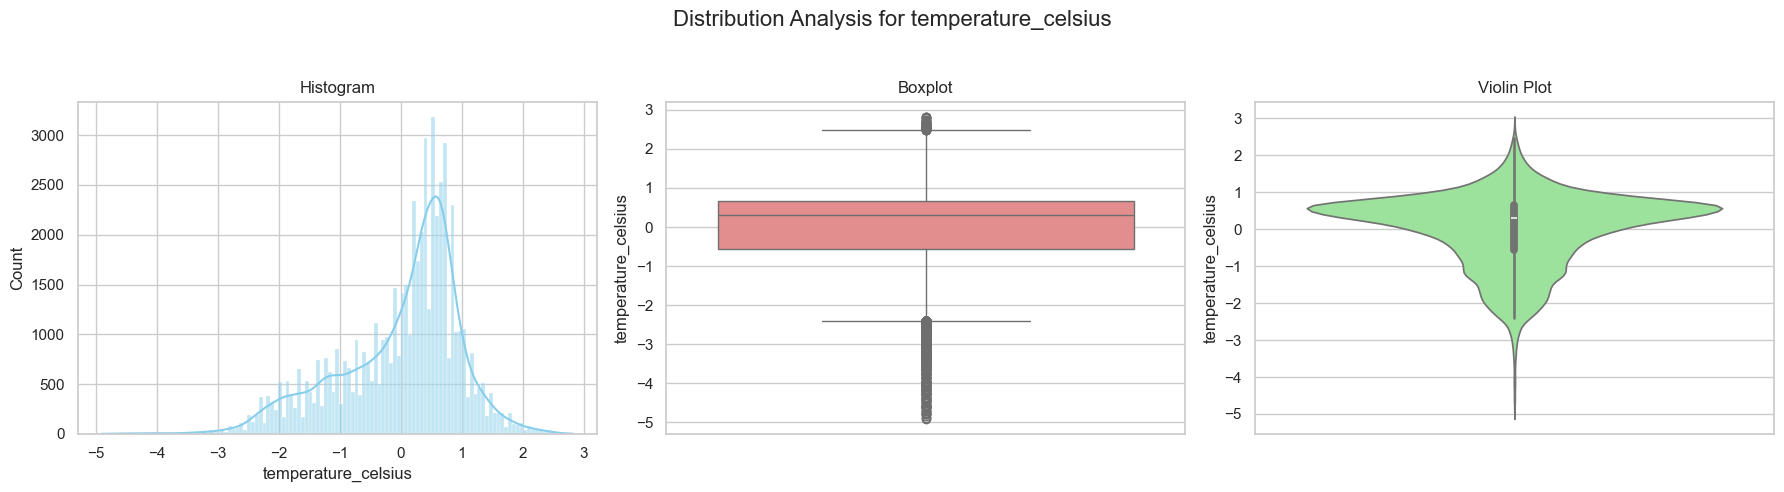


 Feature: humidity
----------------------------------------
count    5.821800e+04
mean    -6.608934e-17
std      1.000009e+00
min     -2.523983e+00
25%     -7.239229e-01
50%      2.170177e-01
75%      7.897642e-01
max      1.485242e+00
Name: humidity, dtype: float64
Skewness: -0.51
Kurtosis: -0.75


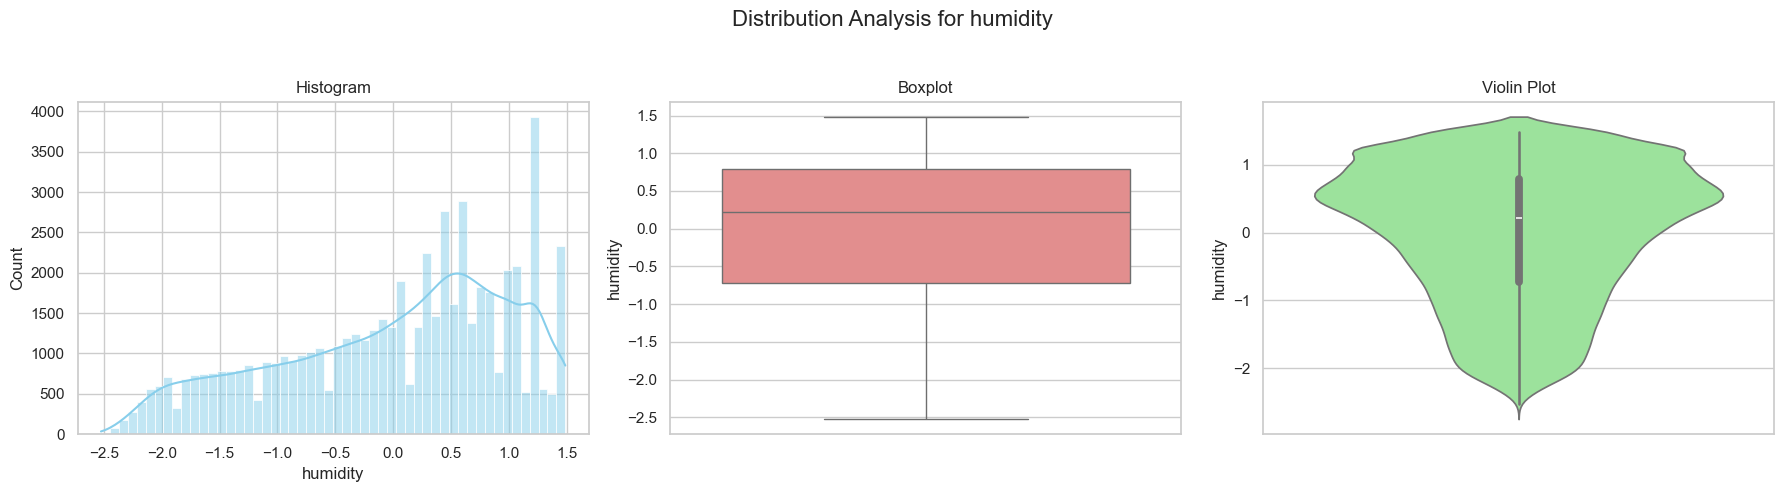


 Feature: air_quality_PM2.5
----------------------------------------
count    5.821800e+04
mean     9.434359e-17
std      1.000009e+00
min     -5.758608e-01
25%     -4.489089e-01
50%     -2.663378e-01
75%      1.017437e-01
max      3.591383e+01
Name: air_quality_PM2.5, dtype: float64
Skewness: 9.80
Kurtosis: 179.24


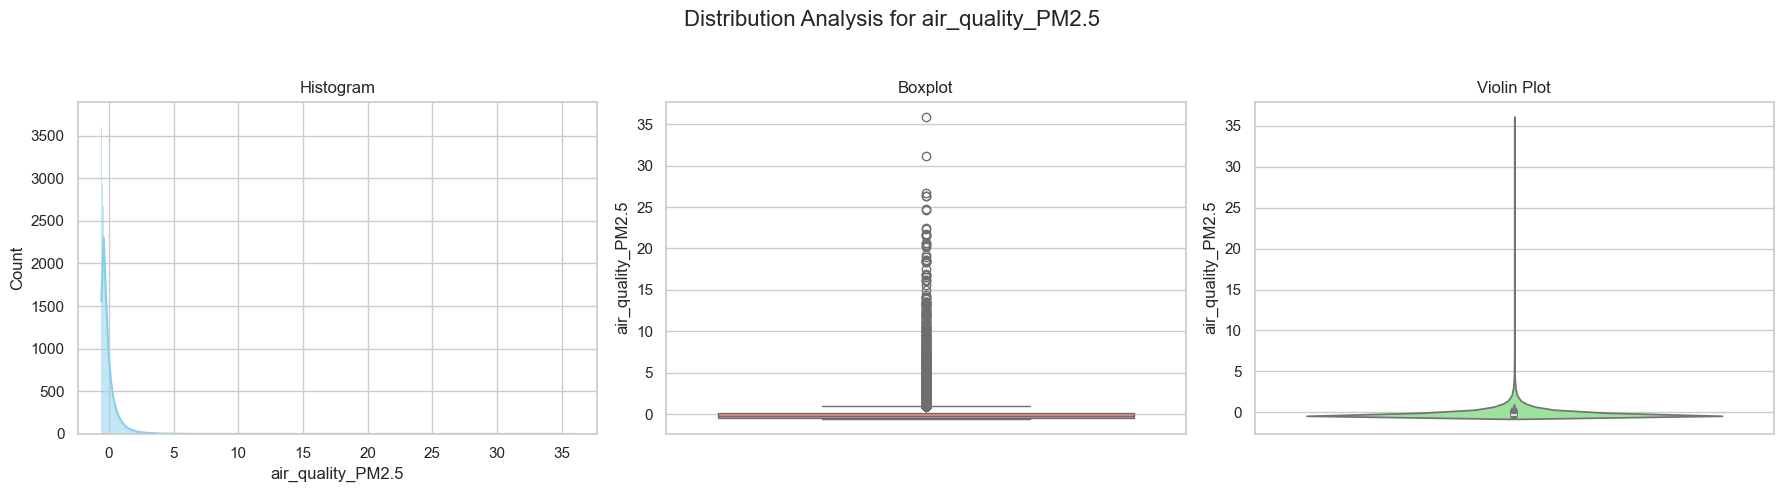


 Feature: air_quality_PM10
----------------------------------------
count    5.821800e+04
mean    -2.440973e-19
std      1.000009e+00
min     -1.183708e+01
25%     -2.669369e-01
50%     -1.916156e-01
75%     -3.486743e-02
max      3.728963e+01
Name: air_quality_PM10, dtype: float64
Skewness: 17.68
Kurtosis: 460.25


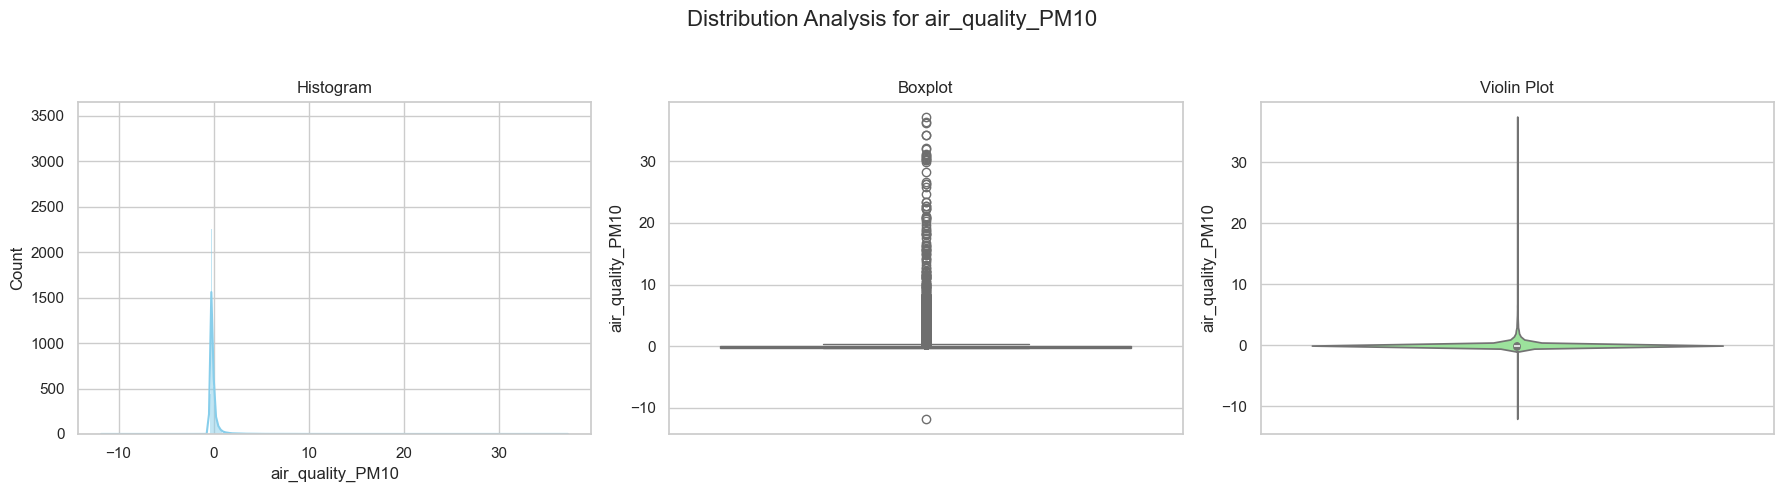


 Feature: air_quality_Ozone
----------------------------------------
count    5.821800e+04
mean    -9.861530e-17
std      1.000009e+00
min     -1.770314e+00
25%     -6.767582e-01
50%     -7.293721e-02
75%      5.392316e-01
max      1.160557e+01
Name: air_quality_Ozone, dtype: float64
Skewness: 1.18
Kurtosis: 4.74


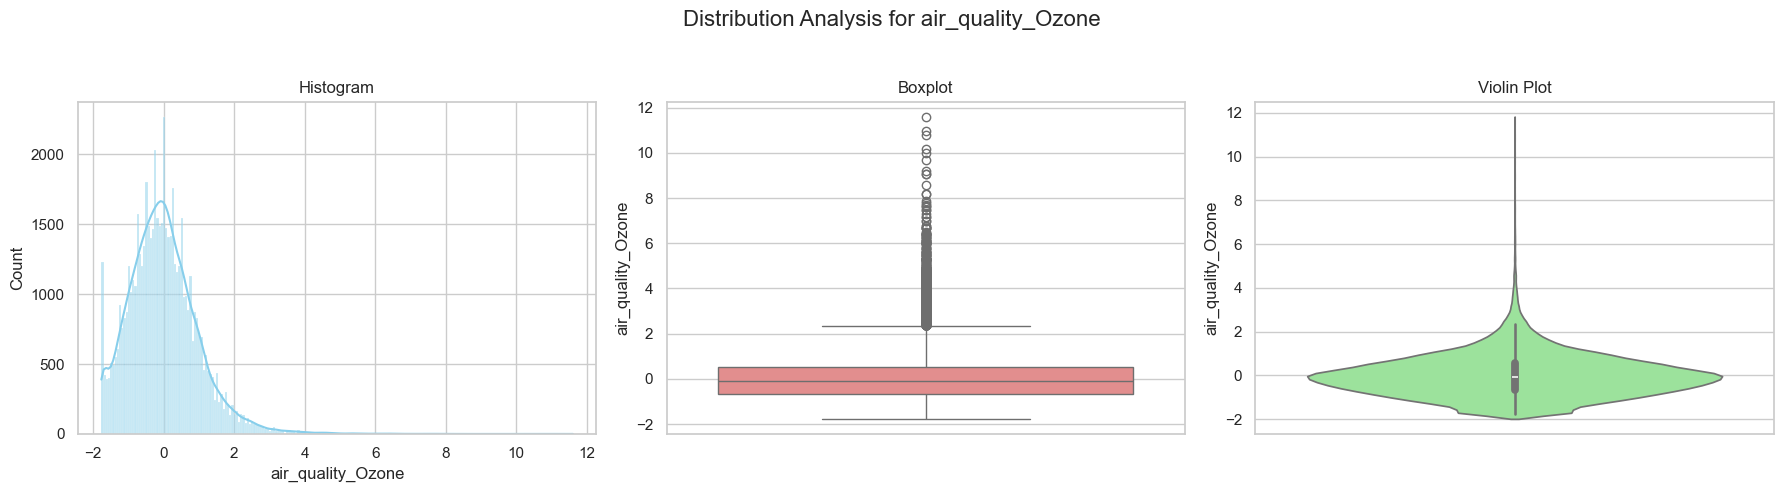


 Feature: air_quality_Carbon_Monoxide
----------------------------------------
count    5.821800e+04
mean    -3.600435e-17
std      1.000009e+00
min     -4.808591e-01
25%     -3.239748e-01
50%     -2.140482e-01
75%     -2.122017e-02
max      4.120998e+01
Name: air_quality_Carbon_Monoxide, dtype: float64
Skewness: 13.38
Kurtosis: 321.94


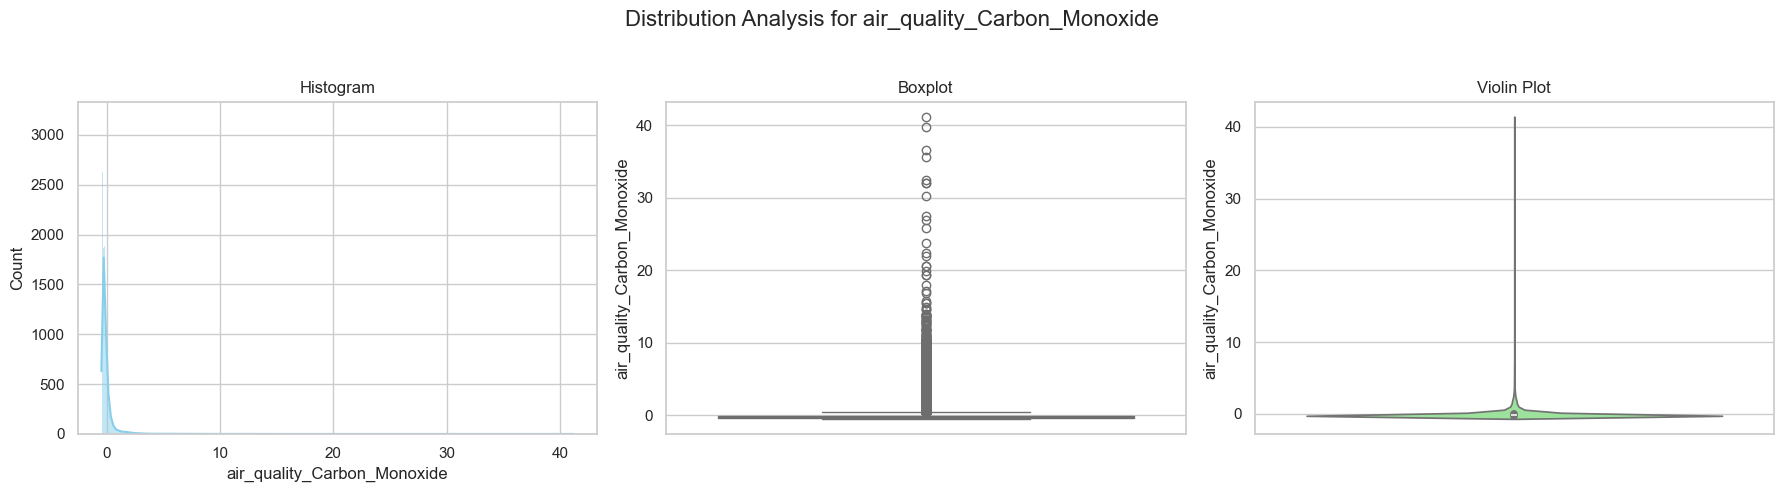

In [5]:
for feature in features:
    print(f"\n Feature: {feature}")
    print("-" * 40)
    print(df[feature].describe())
    print(f"Skewness: {skew(df[feature].dropna()):.2f}")
    print(f"Kurtosis: {kurtosis(df[feature].dropna()):.2f}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Distribution Analysis for {feature}", fontsize=16)

    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title("Histogram")

    # Boxplot
    sns.boxplot(y=df[feature], ax=axes[1], color='lightcoral')
    axes[1].set_title("Boxplot")

    # Violin plot
    sns.violinplot(y=df[feature], ax=axes[2], color='lightgreen')
    axes[2].set_title("Violin Plot")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## Time Series Trends

In [6]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [7]:
df.set_index('last_updated', inplace=True)

In [8]:
df_daily = df.resample('D').mean()

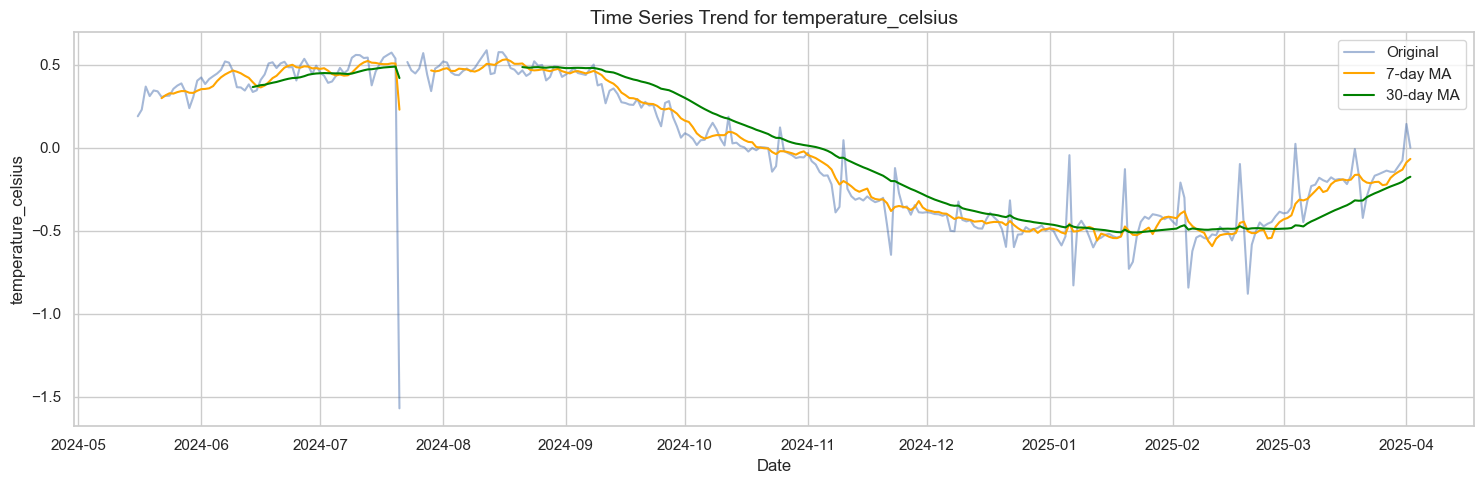

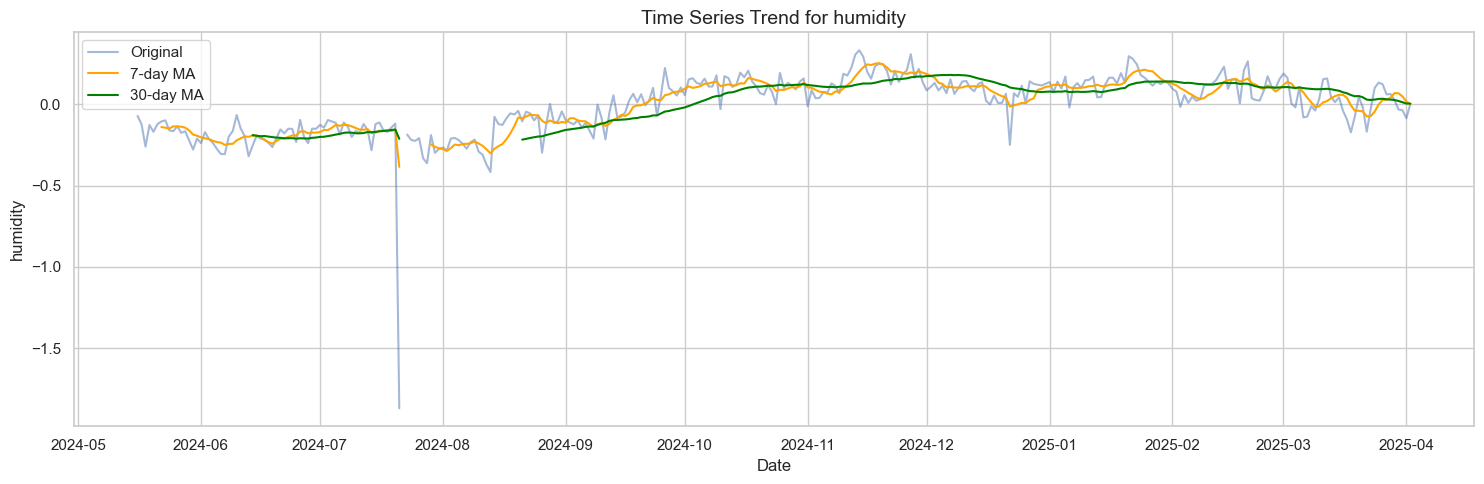

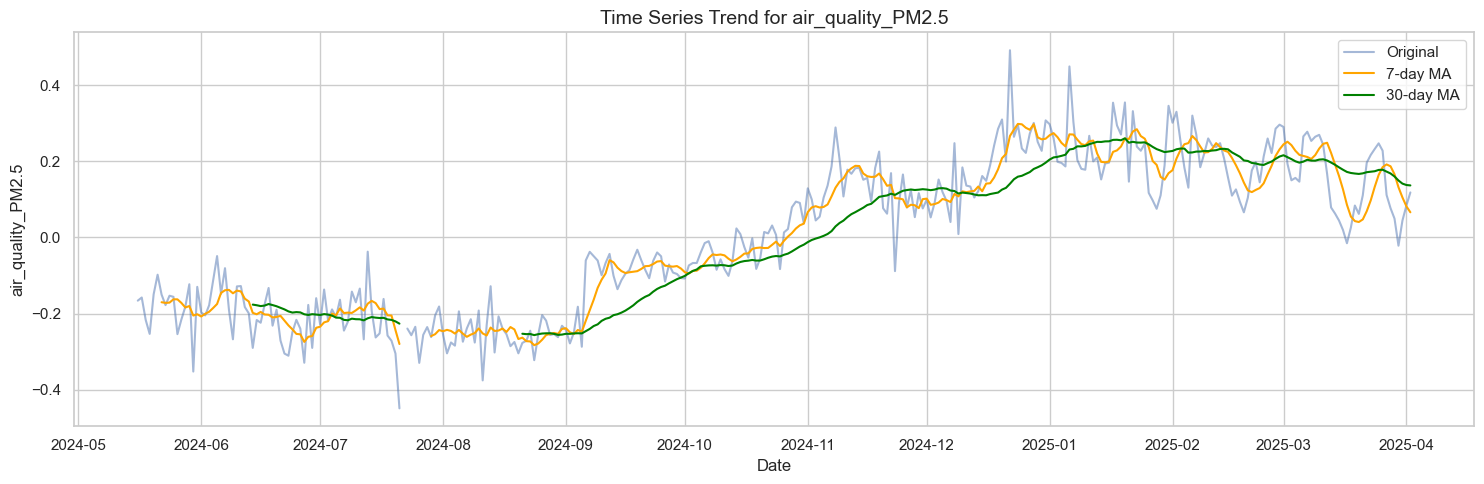

In [9]:
features = ['temperature_celsius', 'humidity', 'air_quality_PM2.5']
for feature in features:
    plt.figure(figsize=(15, 5))
    plt.plot(df_daily[feature], label='Original', alpha=0.5)
    plt.plot(df_daily[feature].rolling(window=7).mean(), label='7-day MA', color='orange')
    plt.plot(df_daily[feature].rolling(window=30).mean(), label='30-day MA', color='green')
    plt.title(f'Time Series Trend for {feature}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

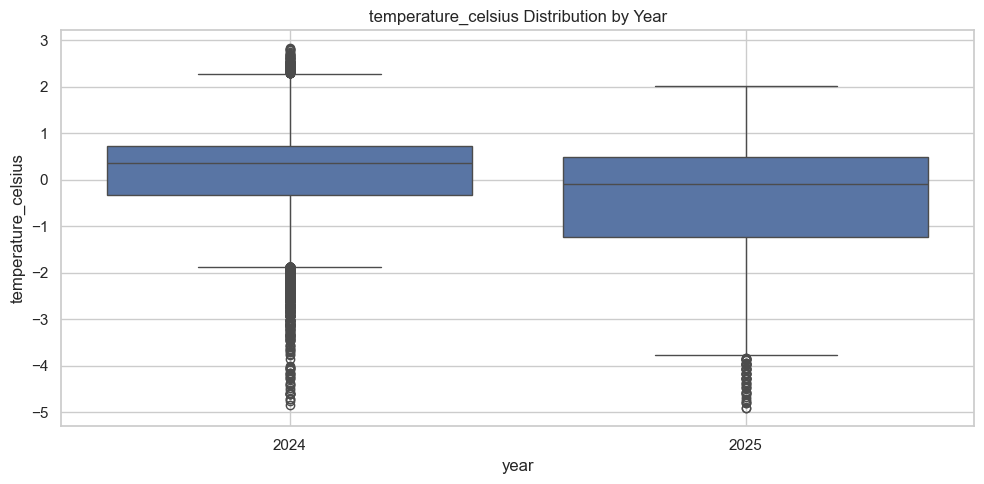

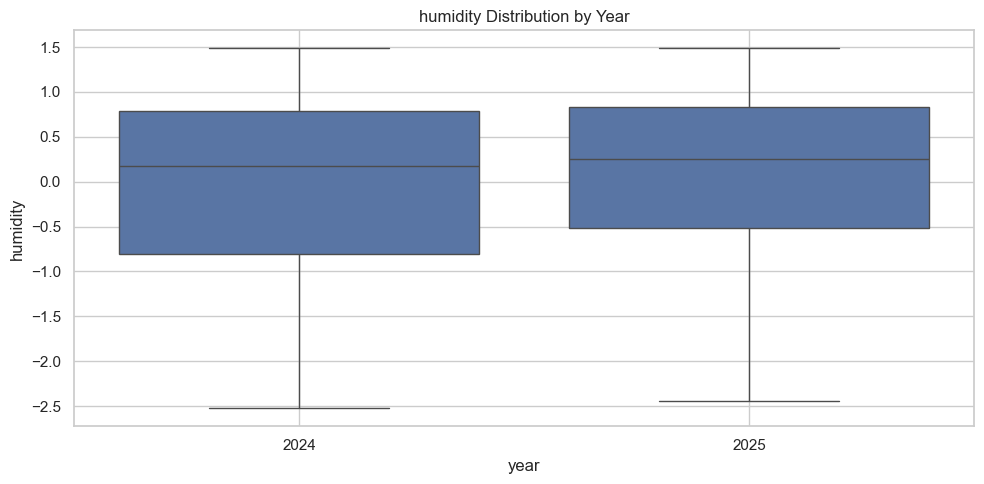

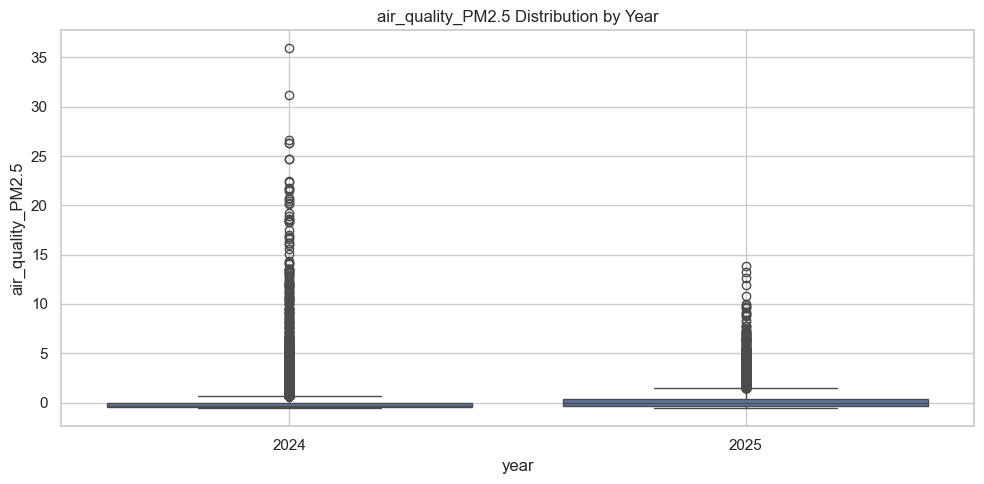

In [11]:
features = ['temperature_celsius', 'humidity', 'air_quality_PM2.5']

# Yearly Trends
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='year', y=feature, data=df)
    plt.title(f'{feature} Distribution by Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

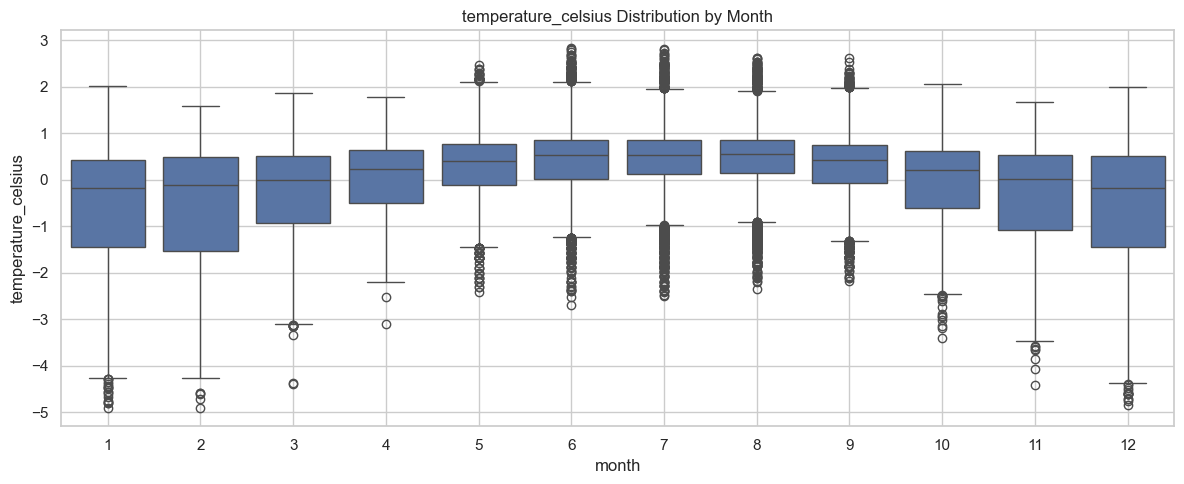

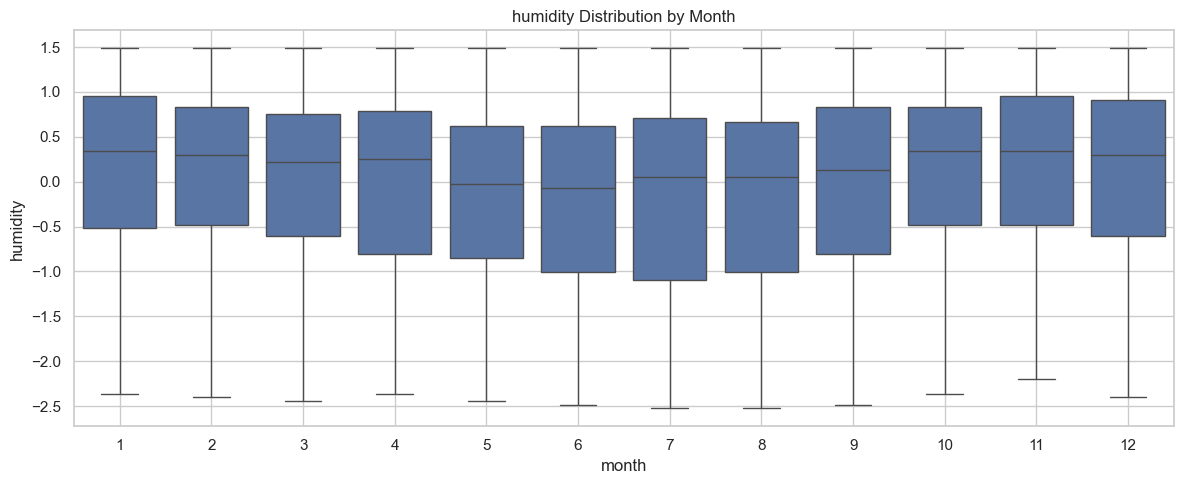

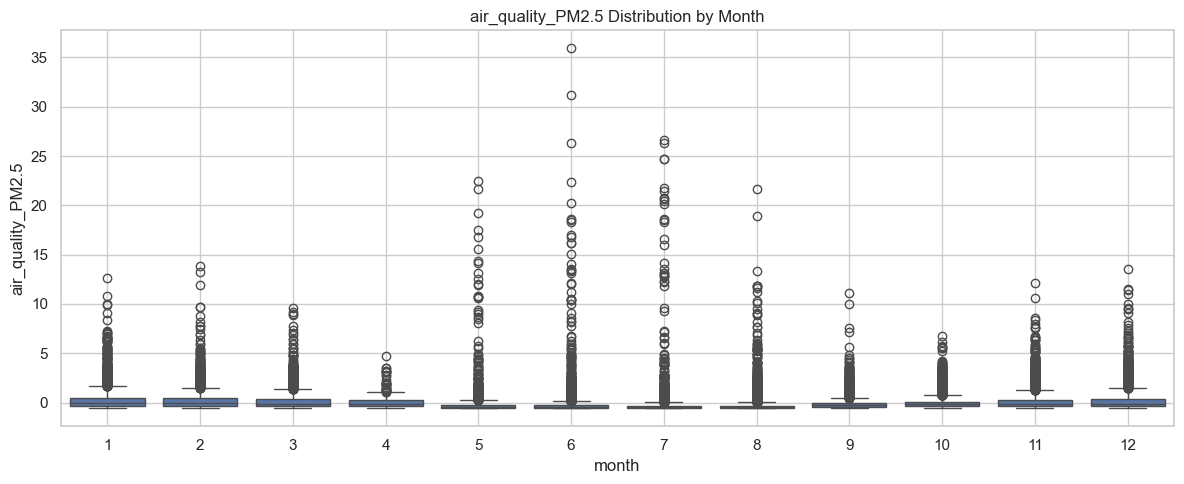

In [12]:
# Monthly Trends
for feature in features:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='month', y=feature, data=df)
    plt.title(f'{feature} Distribution by Month')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

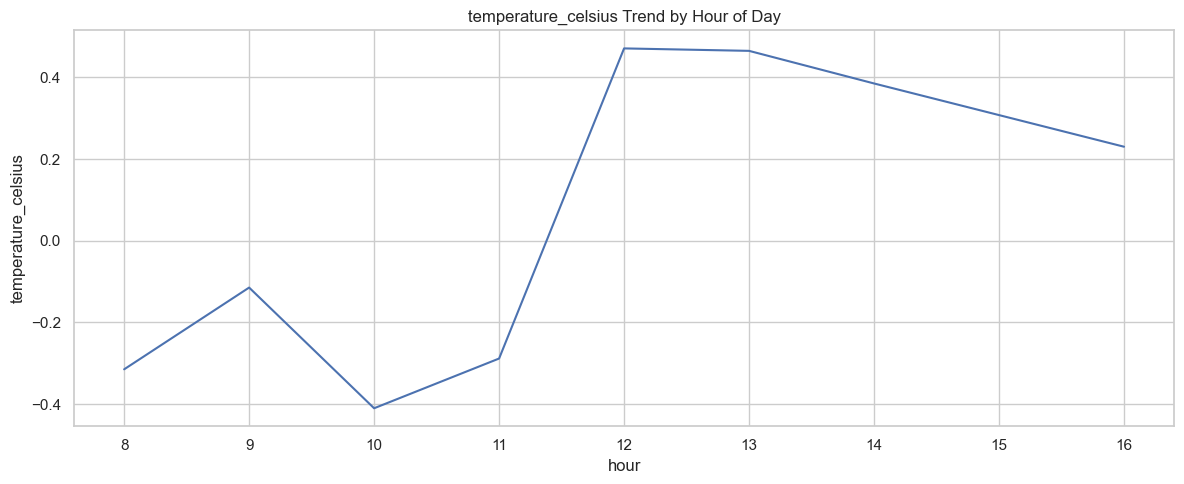

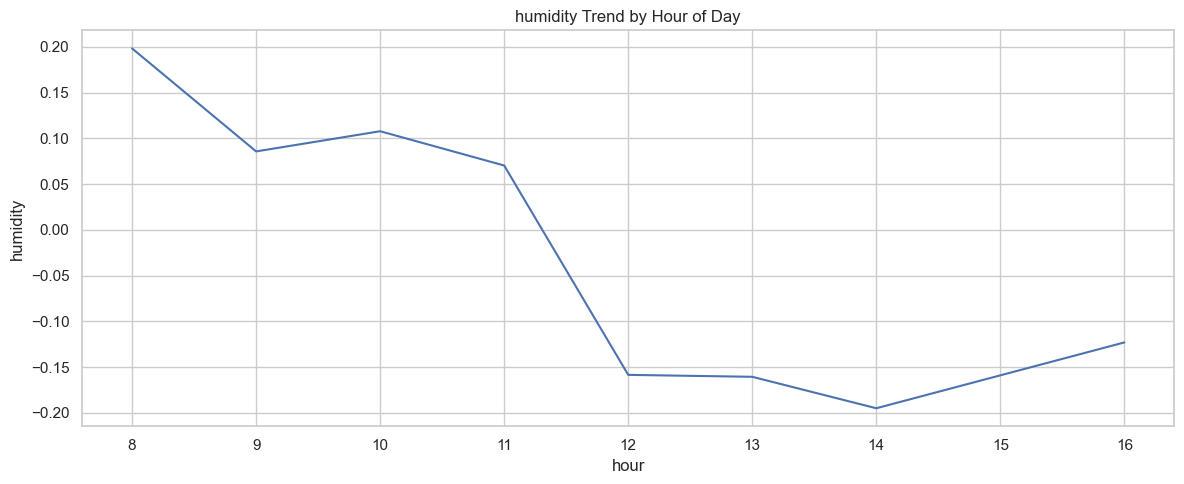

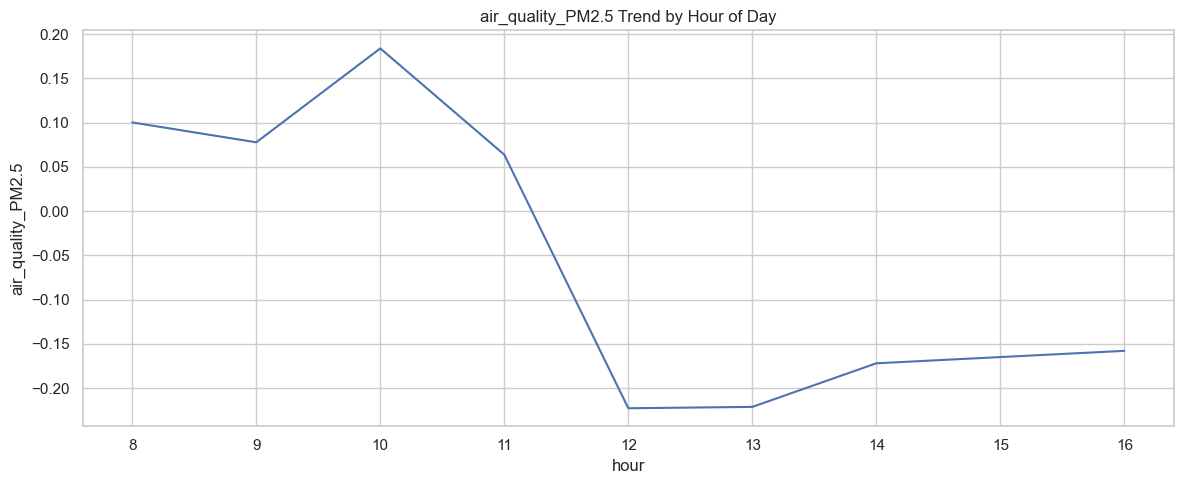

In [13]:
# Hourly Trends
for feature in features:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='hour', y=feature, data=df.groupby('hour')[feature].mean().reset_index())
    plt.title(f'{feature} Trend by Hour of Day')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Correlation Heatmaps

In [28]:
df1 = pd.read_csv('../data/processed/feature_eng_weather_data.csv')

In [29]:
df1['last_updated'] = pd.to_datetime(df1['last_updated'])

In [30]:
df1['real_year'] = df1['last_updated'].dt.year
df1['real_month'] = df1['last_updated'].dt.month
df1['real_day'] = df1['last_updated'].dt.day
df1['real_hour'] = df1['last_updated'].dt.hour

In [23]:
print(df1[['year', 'real_year']].corr())
print(df1[['month', 'real_month']].corr())
print(df1[['day', 'real_day']].corr())
print(df1[['hour', 'real_hour']].corr())

           year  real_year
year        1.0        1.0
real_year   1.0        1.0
            month  real_month
month         1.0         1.0
real_month    1.0         1.0
          day  real_day
day       1.0       1.0
real_day  1.0       1.0
           hour  real_hour
hour        1.0        1.0
real_hour   1.0        1.0


reversing the normalization for few columns to get back proper datetime value for eda

In [31]:
# Get mean and std from real values
year_mean, year_std = df1['real_year'].mean(), df1['real_year'].std()
month_mean, month_std = df1['real_month'].mean(), df1['real_month'].std()
day_mean, day_std = df1['real_day'].mean(), df1['real_day'].std()
hour_mean, hour_std = df1['real_hour'].mean(), df1['real_hour'].std()

# Reverse standardization
df1['year_denorm'] = (df1['year'] * year_std) + year_mean
df1['month_denorm'] = (df1['month'] * month_std) + month_mean
df1['day_denorm'] = (df1['day'] * day_std) + day_mean
df1['hour_denorm'] = (df1['hour'] * hour_std) + hour_mean

df1['year_denorm'] = df1['year_denorm'].round().astype(int)
df1['month_denorm'] = df1['month_denorm'].round().clip(1, 12).astype(int)  # months: 1 to 12
df1['day_denorm'] = df1['day_denorm'].round().clip(1, 31).astype(int)      # days: 1 to 31 (later pd.to_datetime will handle invalid ones like Feb 31)
df1['hour_denorm'] = df1['hour_denorm'].round().clip(0, 23).astype(int)    # hours: 0 to 23

In [32]:
df1['datetime'] = pd.to_datetime({
    'year': df1['year_denorm'],
    'month': df1['month_denorm'],
    'day': df1['day_denorm'],
    'hour': df1['hour_denorm']
}, errors='coerce') 

In [33]:
print(df1[['datetime', 'last_updated']].head())


             datetime        last_updated
0 2024-05-16 08:00:00 2024-05-16 08:45:00
1 2024-05-16 08:00:00 2024-05-16 08:45:00
2 2024-05-16 08:00:00 2024-05-16 08:45:00
3 2024-05-16 08:00:00 2024-05-16 08:45:00
4 2024-05-16 08:00:00 2024-05-16 08:45:00


In [34]:
df1['time_diff'] = (df1['last_updated'] - df1['datetime']).dt.total_seconds() / 60  # in minutes
print(df1[['datetime', 'last_updated', 'time_diff']].head())


             datetime        last_updated  time_diff
0 2024-05-16 08:00:00 2024-05-16 08:45:00       45.0
1 2024-05-16 08:00:00 2024-05-16 08:45:00       45.0
2 2024-05-16 08:00:00 2024-05-16 08:45:00       45.0
3 2024-05-16 08:00:00 2024-05-16 08:45:00       45.0
4 2024-05-16 08:00:00 2024-05-16 08:45:00       45.0


In [37]:
weather_features = [
    'temperature_celsius', 'humidity', 'precip_mm',
    'wind_kph', 'wind_degree',
    'temperature_celsius_lag_1', 'temperature_celsius_lag_7',
    'humidity_lag_1', 'humidity_lag_7',
    'precip_mm_lag_1', 'precip_mm_lag_7',
    'distance_from_equator'
]

In [38]:
corr_matrix = df1[weather_features].corr()

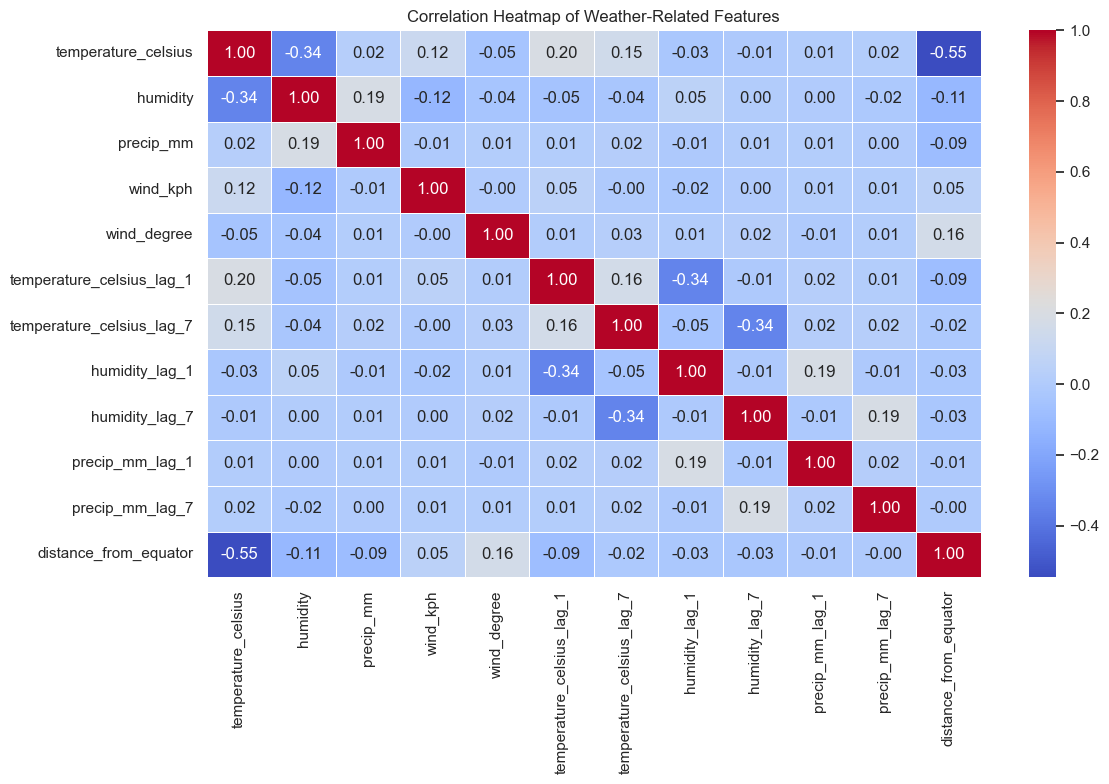

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather-Related Features')
plt.tight_layout()
plt.show()

# Anomaly Detection

In [40]:
from sklearn.ensemble import IsolationForest

In [41]:
anomaly_features = ['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph', 'wind_degree']
X = df1[anomaly_features]

In [42]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

In [43]:
df1['anomaly_score'] = iso_forest.fit_predict(X)

In [44]:
df1['anomaly'] = df1['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

In [45]:
print(df1['anomaly'].value_counts())

anomaly
0    57635
1      583
Name: count, dtype: int64


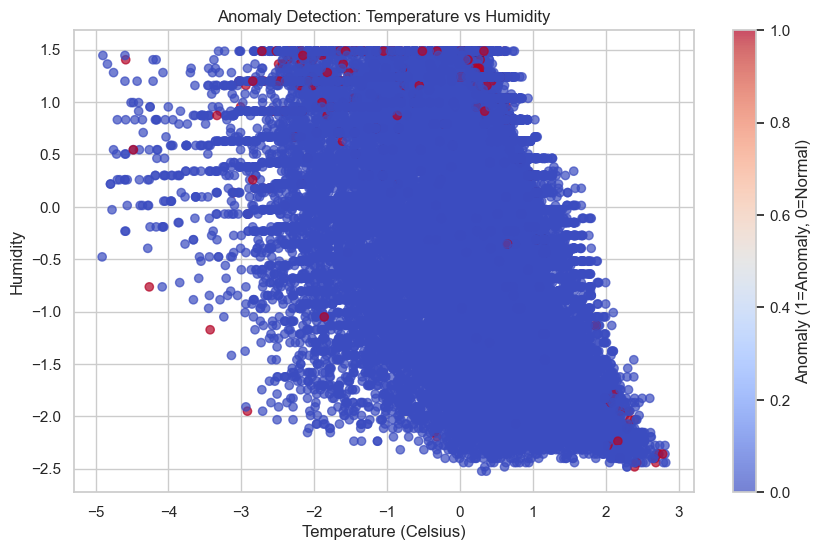

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['temperature_celsius'], df1['humidity'], c=df1['anomaly'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity')
plt.title('Anomaly Detection: Temperature vs Humidity')
plt.colorbar(label='Anomaly (1=Anomaly, 0=Normal)')
plt.grid(True)
plt.show()

Anomaly Pattern

In [47]:
df1['hour'] = df1['datetime'].dt.hour
df1['month'] = df1['datetime'].dt.month_name()

In [48]:
anomalies = df1[df1['anomaly'] == -1]

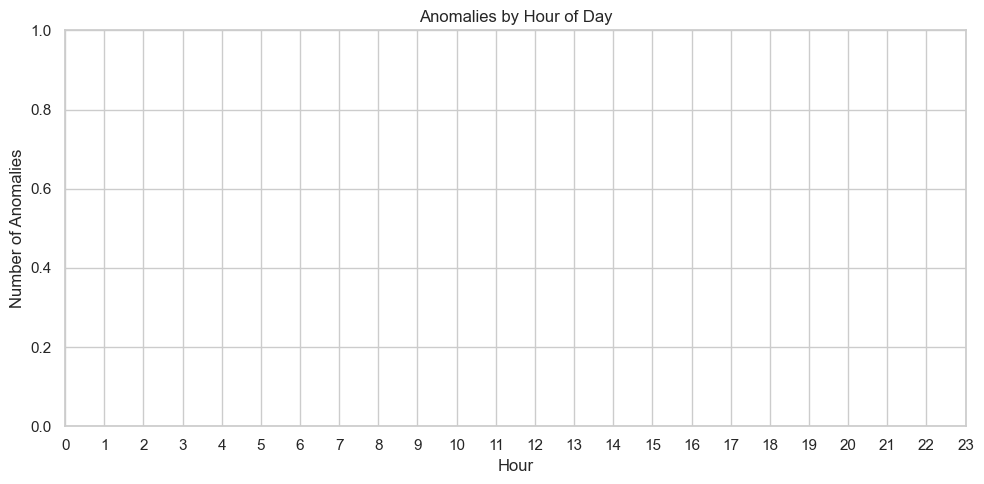

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(data=anomalies, x='hour', palette='Reds')
plt.title('Anomalies by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Anomalies')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

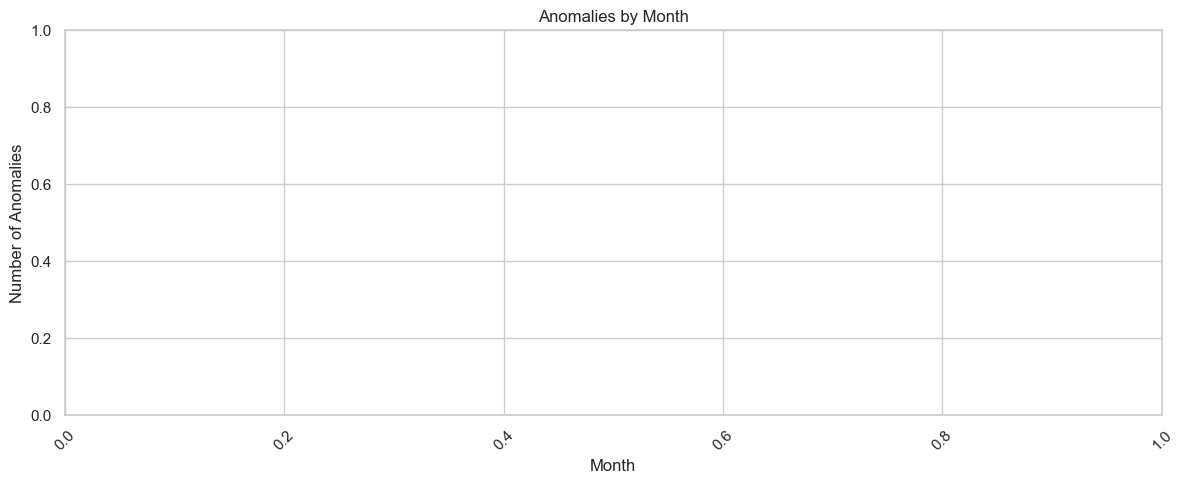

In [50]:
plt.figure(figsize=(12, 5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=anomalies, x='month', order=month_order, palette='Reds')
plt.title('Anomalies by Month')
plt.xlabel('Month')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

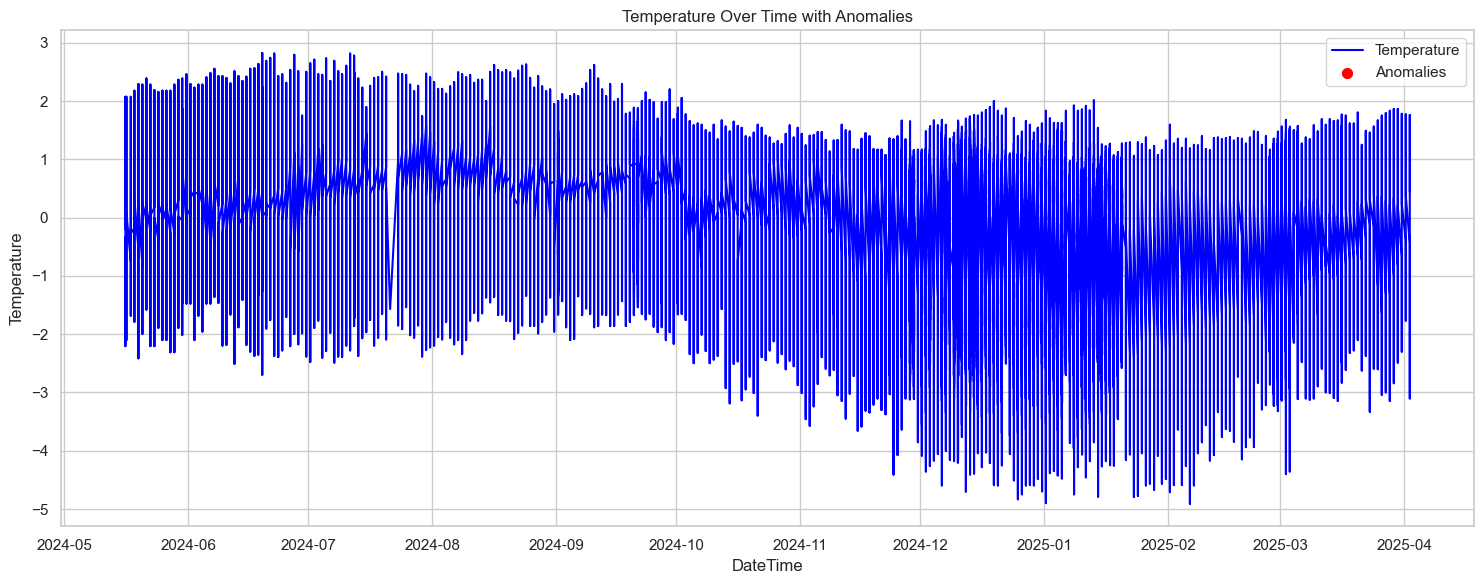

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(df1['datetime'], df1['temperature_celsius'], label='Temperature', color='blue')
anomalies = df1[df1['anomaly'] == -1]
plt.scatter(anomalies['datetime'], anomalies['temperature_celsius'], color='red', label='Anomalies', s=50)

plt.title('Temperature Over Time with Anomalies')
plt.xlabel('DateTime')
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.show()

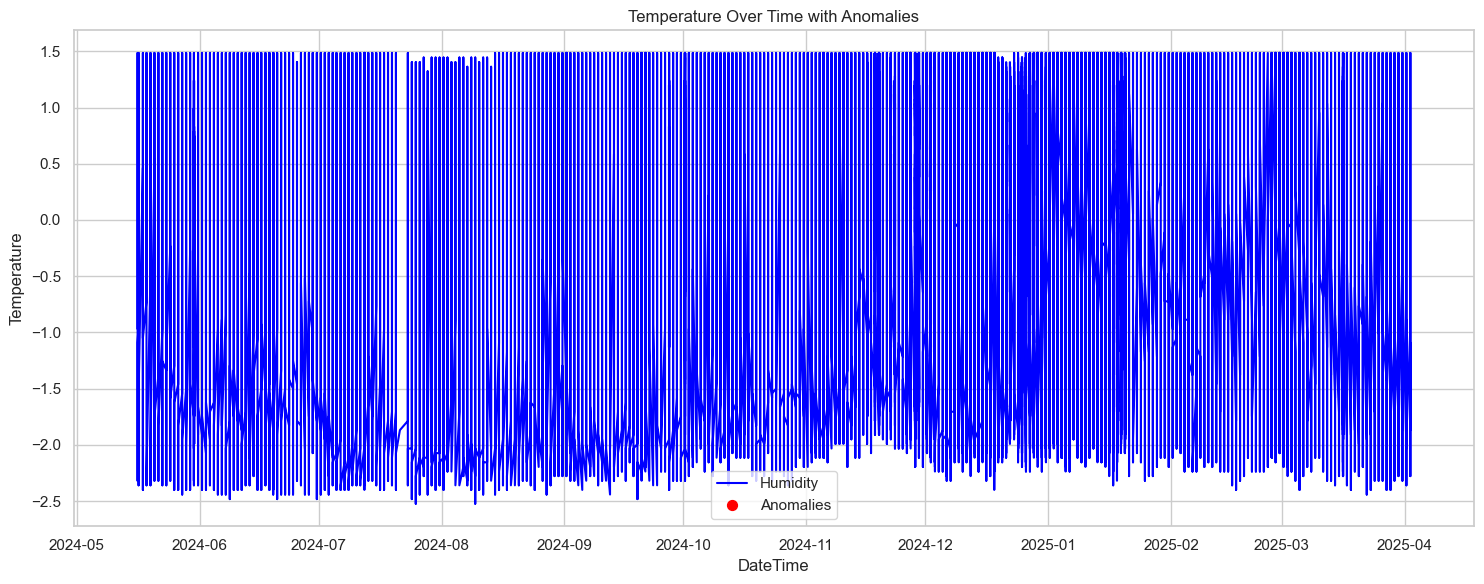

In [57]:
plt.figure(figsize=(15, 6))
plt.plot(df1['datetime'], df1['humidity'], label='Humidity', color='blue')
anomalies = df1[df1['anomaly'] == -1]
plt.scatter(anomalies['datetime'], anomalies['humidity'], color='red', label='Anomalies', s=50)

plt.title('Temperature Over Time with Anomalies')
plt.xlabel('DateTime')
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
anomalies = df1[df1['anomaly'] == -1]
print(anomalies[['datetime', 'temperature_celsius', 'humidity', 'wind_kph']].head(10))


Empty DataFrame
Columns: [datetime, temperature_celsius, humidity, wind_kph]
Index: []


In [61]:
from scipy.stats import zscore
numeric_features = df1.select_dtypes(include=['number']).drop(columns=['year', 'month', 'day', 'hour'], errors='ignore')
z_scores = numeric_features.apply(zscore)

In [69]:
import numpy as np
threshold = 3

# Count how many anomalies each column has
anomaly_feature_counts = (np.abs(z_scores) > threshold).sum().sort_values(ascending=False).head(30)

In [70]:
print("Features most affected by anomalies:")
print(anomaly_feature_counts)

Features most affected by anomalies:
condition_text_Patchy rain nearby    4391
condition_text_Overcast              2803
condition_text_Partly Cloudy         2616
condition_text_Clear                 2511
timezone                             2041
condition_text_Mist                  1857
condition_text_Light rain            1640
visibility_km                        1586
air_quality_Nitrogen_dioxide         1476
condition_text_Light rain shower     1465
wind_power                           1448
air_quality_Sulphur_dioxide          1379
air_quality_us-epa-index              827
air_quality_risk                      796
precip_mm                             755
precip_mm_lag_1                       755
precip_mm_lag_7                       755
air_quality_PM2.5                     755
gust_kph                              739
air_quality_Carbon_Monoxide           735
temp_diff                             661
country                               654
location_name                         6

In [75]:
anomalies = df1[df1['anomaly'] == -1]

for feature in numeric_features:
    print(f"\n📊 Feature: {feature}")
    print(anomalies[feature].describe())
    print(f"Number of anomalies with non-null '{feature}': {anomalies[feature].notnull().sum()}")


📊 Feature: country
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: country, dtype: float64
Number of anomalies with non-null 'country': 0

📊 Feature: location_name
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: location_name, dtype: float64
Number of anomalies with non-null 'location_name': 0

📊 Feature: latitude
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: latitude, dtype: float64
Number of anomalies with non-null 'latitude': 0

📊 Feature: longitude
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: longitude, dtype: float64
Number of anomalies with non-null 'longitude': 0

📊 Feature: timezone
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: timezone, dtype: float64
Number of ano